# ANLP Assignment: Sentiment Classification

In this assignment, you will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

This project aims to investigate Natural Language Processing (NLP) methods for effectively distinguishing between positive and negative sentiments expressed in written movie reviews. Sentiment analysis, a subfield of NLP, plays a vital role in understanding public opinions and preferences, particularly in the movie industry where customer reviews heavily influence decision-making processes. The primary objective is to develop robust NLP techniques that accurately classify movie reviews into positive or negative categories.

The project involves exploring various NLP techniques, evaluating their performance, and investigating potential enhancements to optimize the classification accuracy. The outcome of this project will contribute to the advancement of sentiment analysis methods in the NLP field and provide valuable insights for decision-makers in the movie industry.

In [ ]:
candidateno=277254 #Niloufar Esfahanian #this MUST be updated to your candidate number so that you get a unique data sample

In [ ]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [ ]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the
            pair is a list of the training data and the second is a list of the test data.
    """

    data = list(data)
    n = len(data)
    train_indices = random.sample(range(n), int(n * ratio))
    test_indices = list(set(range(n)) - set(train_indices))
    train = [data[i] for i in train_indices]
    test = [data[i] for i in test_indices]
    return (train, test)


def get_train_test_data():

    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')

    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]

    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [ ]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['rated', ':', 'r', 'for', 'strong', 'language', ',', ...], 'pos')


1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

In [ ]:
from nltk.corpus import stopwords

def normalise(wordlist):
    stop_words = set(stopwords.words('english'))
    filtered=[word for word in wordlist if word.isalpha() and word not in stop_words]
    return filtered

pos_freq_dist=FreqDist()
neg_freq_dist=FreqDist()

training_norm=[(FreqDist(normalise(wordlist)), label) for (wordlist, label) in training_data]
testing_norm=[(FreqDist(normalise(wordlist)), label) for (wordlist, label) in testing_data]

for reviewDist, label in training_norm:
    if label == 'pos':
        pos_freq_dist+=reviewDist
    else:
        neg_freq_dist+=reviewDist

def most_frequent_words(first_el,sec_el,topk):
    difference=first_el - sec_el
    sorteddiff=difference.most_common()
    justwords=[word for (word,freq) in sorteddiff[:topk]]
    return justwords

10 content words which are representative of the positive reviews

In [ ]:
my_positive_word_list = most_frequent_words(pos_freq_dist,neg_freq_dist,10)

10 content words which are representative of the positive reviews

In [ ]:
my_negative_word_list = most_frequent_words(neg_freq_dist,pos_freq_dist,10)

In [ ]:
print(my_negative_word_list)
print(my_positive_word_list)

['bad', 'movie', 'plot', 'worst', 'script', 'boring', 'nothing', 'stupid', 'get', 'supposed']
['film', 'life', 'also', 'story', 'well', 'great', 'world', 'best', 'performance', 'one']


*   In the first line I use a tool (library) called **NLTK** that imports a set of common English words that usually don't carry significant meaning in text analysis. These words are often called "stopwords."
*  Here I employed **"normalise"** function, normalise is a function that takes a list of words (wordlist) as input. It removes non-alphabetic words (those that contain only letters) and stopwords from the list and returns the cleaned list.
*   Then two frequency distributions (pos_freq_dist and neg_freq_dist) are initialized. These will be used to count the occurrences of words in positive and negative contexts.
*  **Processig trainning and testing data**: In this step the code applies the normalise function to each list of words in both the training and testing datasets. For each review, it creates a frequency distribution of cleaned words and associates it with the corresponding label (positive or negative).
*   After that this loop goes through each review in the training set, and if the review is labeled as positive ('pos'), it adds the word frequencies to the positive frequency distribution (pos_freq_dist). If it's labeled as negative, it adds to the negative frequency distribution (neg_freq_dist).
*   The last part defines a function "most_frequent_words" that takes the positive and negative frequency distributions and returns the top k words that are more common in positive reviews compared to negative reviews.


**In summary, this code is a simple text analysis pipeline that cleans and processes text data, calculates word frequencies for positive and negative contexts, and identifies the most discriminative words between positive and negative reviews.**



2)
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


In [ ]:
class SimpleClassifier(ClassifierI):

    def __init__(self, pos, neg):
        self._pos = pos
        self._neg = neg

    def classify(self, doc):
        score = 0
 #doc is a FreqDist
 # assigns an appropriate value to score
        for word,value in doc.items():
            if word in self._pos:
                score+=value
            if word in self._neg:
                score-=value
        score = sum(doc.get(word, 0) for word in self._pos) - sum(doc.get(word, 0) for word in self._neg)

        return "neg" if score < 0 else "pos"

Example usage

In [ ]:
classifier = SimpleClassifier(my_positive_word_list, my_negative_word_list)
classifier.classify(FreqDist("this movie was great".split()))

'pos'

In [ ]:
classifier = SimpleClassifier(my_positive_word_list, my_negative_word_list)
classifier.classify(FreqDist("this movie was boring".split()))

'neg'



> **Class** **definition**:
*   Class named SimpleClassifier is defined.
*   It inherits from ClassifierI, a base class for classifiers in NLTK.

> --**init**-- **method**:
*    The class has an __init__ method to initialize the classifier.
*   It takes positive (pos) and negative (neg) word lists as parameters.


> **Explaination**:


*  The SimpleClassifier takes three arguments: the document (that we want to classify), the positive, and the negative word lists.

*   In the classify function, a variable is defined, called score and its initial value is 0.

*   It is going to iterate through the document tokens, and if the tokens exist in positive or negative word list. If the token existed in positive word list, it add the number of its repetitions in that document to the score variable, and if the token existed in negative word list, it subtract it from the score variable.
*   In the end, if the value of the score was positive, the function returns "pos", and if its value was negative, it returns "neg".

**In summary**, SimpleClassifier is a basic text classifier that uses a scoring mechanism based on predefined positive and negative word lists to determine the sentiment of a given document.


3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

In [ ]:
class ConfusionMatrix:
    def __init__(self,predicted_labels,actual_labels,classes=("pos","neg")):

        (self.c1,self.c2)=classes
        self.TP=0
        self.FP=0
        self.FN=0
        self.TN=0
        for p,a in zip(predicted_labels, actual_labels):
            if a==self.c1:
                if p==self.c1:
                    self.TP+=1
                else:
                    self.FN+=1

            elif p==self.c1:
                self.FP+=1
            else:
                self.TN+=1


    def precision(self):
        p = self.TP / (self.TP + self.FP)

        return p

    def recall(self):
        r = self.TP / (self.TP + self.FN)

        return r

    def accuracy(self):
        a = (self.TP + self.TN) / (self.TP + self.TN + self.FN + self.FP)
        return a

    def f1(self):
        f1=0

        p=self.precision()
        r=self.recall()
        f1=(2*p*r)/(p+r)
        return f1

In [ ]:
docs,labels=zip(*testing_norm)
senti_cm=ConfusionMatrix(classifier.classify_many(docs),labels)
accuarcy_of_wordlist_cls = senti_cm.accuracy()
print("The accuarcy is {}".format(accuarcy_of_wordlist_cls))
print("The precision is {}".format(senti_cm.precision()))
print("The recall is {}".format(senti_cm.recall()))
print("The F1 is {}".format(senti_cm.f1()))

The accuarcy is 0.5966666666666667
The precision is 0.5577689243027888
The recall is 0.9333333333333333
The F1 is 0.6982543640897756


> Part a)

*  The '**ConfusionMatrix**' class is defined to evaluate the performance of a classification model. It is useful to evaluate performance of classifier with precision, recall and F1 score. These metrics allow us to distinguish the different types of errors our classifiers make.  
*   The class is initialized with predicted labels, actual labels and class lablels ('classes').
*   The matrix has four components: TruPositive('TP'),False Positive (FP), False Negative (FN), and True Negative (TN). The class labels are assumed to be "pos" and "neg" by default.
*   **Precision** tells us how many of the predicted positive instances are actually positive. It is calculated by dividing True Positives (TP) by the sum of True Positives and False Positives (TP + FP).
*   **Recall**, also known as Sensitivity or True Positive Rate, indicates how many of the actual positive instances were captured by the model. It is calculated by dividing True Positives (TP) by the sum of True Positives and False Negatives (TP + FN).
*   **Accuracy** gives an overall measure of how well the model is performing. It is calculated by dividing the sum of True Positives and True Negatives (TP + TN) by the total number of instances (TP + TN + FN + FP)
*   **F1 score**  provides a balanced measure of a model's performance, especially when dealing with imbalanced datasets.


> Part b)

*  When we are dealing with a **balanced dataset** (e.g., 1500 positive and 1500 negative reviews), accuracy is a reasonable metric because it provides an overall measure of correct classifications.
In contrast, when we are dealing with an **imbalanced dataset** (e.g., 1900 positive and 100 negative reviews), other metrics like precision, recall, and F1 score become more crucial due to the potential impact of false positives and false negatives.

* We use **Recall** when in scenarios false negatives are critical and have serious consequences. Also, ensures that the classifier identifies as many positive instances as possible, minimizing the chances of missing important cases.
* We use **Precision** when false positives are costly or undesirable.
In additon, relevant in scenarios like marketing campaigns or YouTube recommendations, where incorrectly recommending irrelevant content may harm the user experience.

**Therefor, when we have an imbalanced dataset, recall and precision are more useful.**

4)
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results.

[12.5\%]

In [ ]:
import nltk
naive_classifier = nltk.NaiveBayesClassifier.train(training_norm)
#Train a Naive Bayes classifier using the provided training data

In [ ]:
sent ="This movie was great" #Define a sample sentence for sentiment analysis
naive_classifier.classify(FreqDist(sent.split())) #Classify the sentiment of the sample sentence using the trained Naive Bayes classifier

'pos'

In [ ]:
docs,labels=zip(*testing_norm) # Extract testing data and labels
senti_cm=ConfusionMatrix(naive_classifier.classify_many(docs),labels) #Evaluate the performance of the Naive Bayes classifier using a confusion matrix
#Calculate accuracy, precision, recall, and F1 score of the Naive Bayes classifier
accuarcy_of_naivebayes = senti_cm.accuracy()
print("The accuarcy = {}".format(accuarcy_of_naivebayes))
print("The precision = {}".format(senti_cm.precision()))
print("The recall = {}".format(senti_cm.recall()))
print("The F1 = {}".format(senti_cm.f1()))

The accuarcy = 0.6816666666666666
The precision = 0.6162046908315565
The recall = 0.9633333333333334
The F1 = 0.7516254876462938


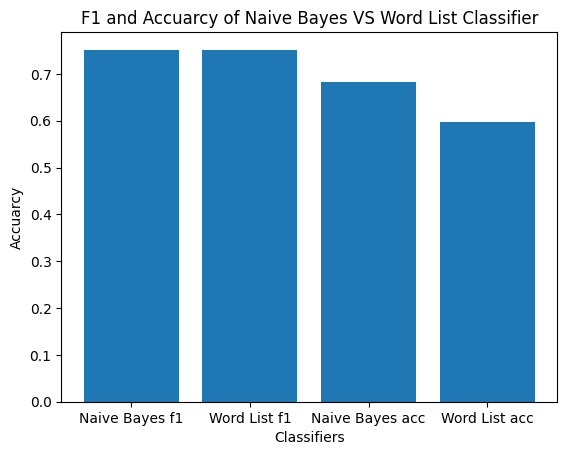

In [ ]:
import numpy as np
f1_of_naivebayes = senti_cm.f1()
#Evaluate the performance of another classifier (assumed to be named 'classifier')
senti_cm_my_class = ConfusionMatrix(classifier.classify_many(docs),labels)
f1_of_myclass = senti_cm.f1()#Calculate F1 score of the second classifier

plt.rcParams["figure.facecolor"] = "w"
# Plot a bar chart comparing F1 scores and accuracy of the two classifiers
X = ['Naive Bayes f1', 'Word List f1', 'Naive Bayes acc', 'Word List acc']

X_axis = np.arange(len(X))

#Print the evaluation metrics for the Naive Bayes classifier
plt.bar(X_axis , [f1_of_naivebayes, f1_of_myclass, accuarcy_of_naivebayes, accuarcy_of_wordlist_cls])

plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("Accuarcy")
plt.title("F1 and Accuarcy of Naive Bayes VS Word List Classifier")
plt.show()

* First of all, a Naive Bayes classifier is trained using a dataset (training_norm) containing labeled instances.
* Then the performance of the Naive Bayes classifier is evaluated by using a confusion matrix (ConfusionMatrix) and calculates accuracy, precision, recall, and F1 score.
* After that I compared the performance of these two classifier by using a confusion matrix. F1 score is calculated for coparison.
* As you can see, a bar chart is created to visually compare the F1 scores and accuracy of the Naive Bayes classifier and another classifier.

 **Summary** :
 **This code trains a Naive Bayes classifier for sentiment analysis, evaluates its performance using various metrics, compares it with another classifier, and visualizes the results with a bar chart. The goal is to understand how well the classifiers perform in terms of accuracy and F1 score.**

5)
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions.

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


In [ ]:
#Two word lists, the_positive_word_list and the_negative_word_list, containing the 50 most frequent positive and negative words, respectively, are generated.
the_positive_word_list_30 = most_frequent_words(pos_freq_dist,neg_freq_dist,150)
the_negative_word_list_30 = most_frequent_words(neg_freq_dist,pos_freq_dist,150)

accuracies = [] #Some lists to keep track of the metrics
f1s = []
recalls = []
precisions = []
tffn = []

docs,labels=zip(*testing_norm)

for lenght in range(0,150):
  movie_review_classifier = SimpleClassifier(the_positive_word_list_30[:lenght],the_negative_word_list_30[:lenght]) #We change the lenght of the word list here
  senti_cm = ConfusionMatrix(movie_review_classifier.classify_many(docs),labels)
  f1s.append(senti_cm.f1())
  accuracies.append(senti_cm.accuracy())
  recalls.append(senti_cm.recall())
  precisions.append(senti_cm.precision())
  tffn.append((senti_cm.TP,senti_cm.FP,senti_cm.FN,senti_cm.TN)) #Adding true positives, false positives, false negatives and true negatives to a list to track them

The best F1 score is 0.7309644670050761,  when the size of wordlist is 31
The best Accuracy score is 0.6466666666666666, when the size of wordlist is 31
The best Precision score is 0.5901639344262295,  when the size of wordlist is  31
The best Recall score is 1.0,  when the size of wordlist is  0


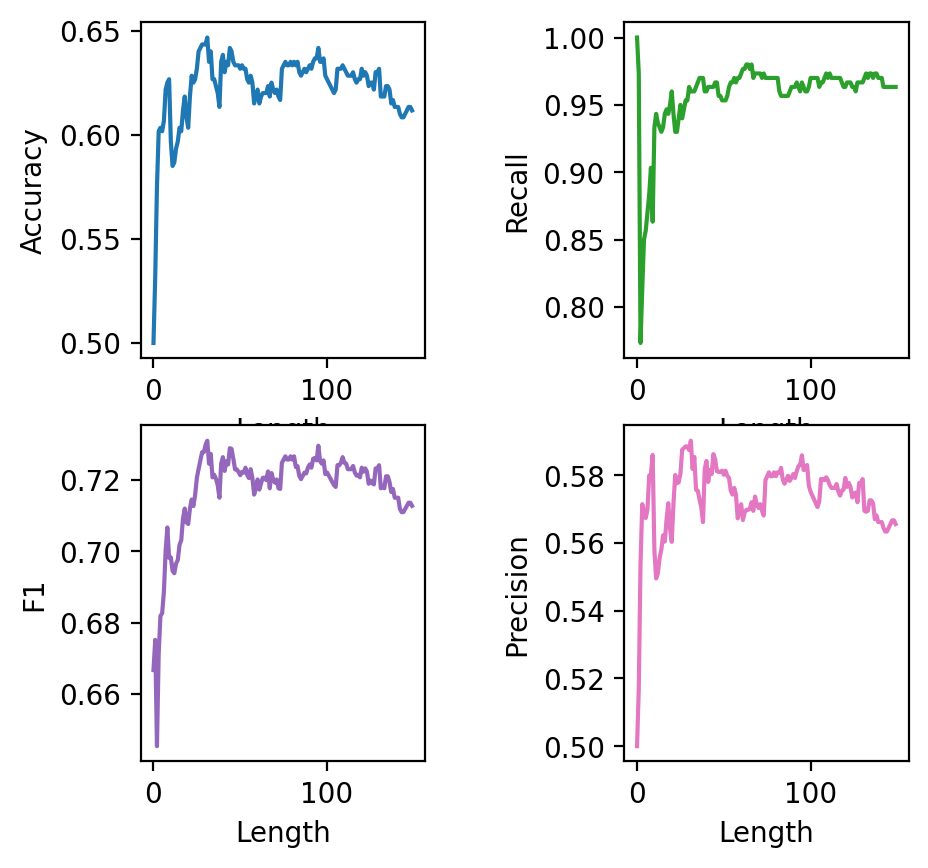

In [ ]:
fig, axs = plt.subplots(2, 2)
fig.set_dpi(200)
fig.subplots_adjust(left=0.3, wspace=0.7)
plt.rcParams["figure.facecolor"] = "w"

axs[0, 0].set(ylabel='Accuracy')
axs[0, 0].plot(accuracies)

axs[0, 1].set(ylabel='Recall')
axs[0, 1].plot(recalls, 'tab:green')

axs[1, 0].set(ylabel='F1')
axs[1, 0].plot(f1s, 'tab:purple')


axs[1, 1].plot(precisions, 'tab:pink')
axs[1, 1].set(ylabel='Precision')

for ax in axs.flat:
    ax.set_xlabel("Length")


print("The best F1 score is {},  when the size of wordlist is {}".format(np.max(f1s),f1s.index(np.max(f1s))))
print("The best Accuracy score is {}, when the size of wordlist is {}".format(np.max(accuracies),accuracies.index(np.max(accuracies))))
print("The best Precision score is {},  when the size of wordlist is  {}".format(np.max(precisions),precisions.index(np.max(precisions))))
print("The best Recall score is {},  when the size of wordlist is  {}".format(np.max(recalls),recalls.index(np.max(recalls))))

In [ ]:
tffn[0] #(true-positives, false-positives, false-negatives, and true-negatives) at the firt iteration

(300, 300, 0, 0)


**Experiment Explaination**:  
The experiment wants to see how the length of word lists affects a classifier's performance. Two lists with common positive and negative words are made. The classifier is trained and tested on movie reviews, and we're changing the word list length to see how it impacts the results.


*   I created a **for loop** that in each round adjusts the word list length, retrains the classifier, tests how well the classifier performs and records the performance results in lists for keeping track. (Accuracies recalls, precisions, F1 scores, and confusion matrix values (True Positive, False Positive, False Negative, True Negative) are collected for each iteration.)
Then I created 2x2subplot to show the trends of accuracy, recalls, precision and the corresponding metric values.
The results provide information on impact of word list length on accuracy, recall, precision, and F1 score.
As you can see, the optimal accuracy and F1 scores occur with a word list size of 31. It's important to note that these results might vary with a different test set. Conversely, a shorter word list could be more informative in some cases.

**To conclude** for sentiment analysis in movie reviews, a finely tuned word list classifier can be effective, particularly when specific words carry significant weight, and interpretability is a priority. However, in cases where the dataset is diverse, and context holds paramount importance, opting for a Naive Bayes classifier might offer superior generalization by taking into account the entire vocabulary.





In [ ]:
#This code will word count all of the markdown cells in the notebook saved at filepath
import io
from nbformat import current

from google.colab import drive
drive.mount('/content/drive')

filepath="/content/drive/MyDrive/Colab Notebooks/ANLPassignment2023.ipynb"
question_count=432

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))